# **食べられるキノコ、食べられないキノコの分類**

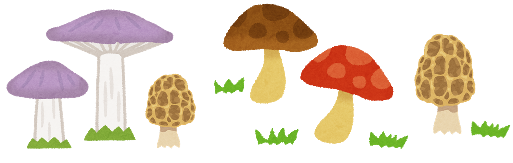

In [ ]:
import numpy as np
import pandas as pd
import sklearn

In [ ]:
# データの読み込み
df = pd.read_csv('mushrooms.csv')

# キノコの様子を確認
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [ ]:
# 読み込んだデータの行数、列数を表示する
print('読み込んだデータの行数、列数：', df.shape)

# データ内の欠損値の数を表示する
print('読み込んだデータ全体の欠損値数：', df.isnull().sum().sum())

読み込んだデータの行数、列数： (8124, 23)
読み込んだデータ全体の欠損値数： 0


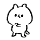
欠損値がないことが判明したので、正解データのラベルエンコーディングを行う

In [ ]:
# class列は正解データなので、poisonous→1（食べられない） edible→0（食べられる）として使うことにする。
# ラベルエンコーダを使う
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# class列のみラベルエンコーディング
encoded = le.fit_transform(df['class'].values)
df['encoded'] = encoded
# できてるか確認
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,encoded
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,white,white,partial,white,one,pendant,black,scattered,urban,1
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,white,white,partial,white,one,pendant,brown,numerous,grasses,0
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,white,white,partial,white,one,pendant,brown,numerous,meadows,0
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,white,white,partial,white,one,pendant,black,scattered,urban,1
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,white,white,partial,white,one,evanescent,brown,abundant,grasses,0


In [ ]:
# エンコーディングの成功が確認できたため、class列をdropし、encoded列を正解データとして扱う
df1 = df.iloc[:,1:]
df1.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,encoded
0,convex,smooth,brown,yes,pungent,free,close,narrow,black,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,1
1,convex,smooth,yellow,yes,almond,free,close,broad,black,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,grasses,0
2,bell,smooth,white,yes,anise,free,close,broad,brown,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,meadows,0
3,convex,scaly,white,yes,pungent,free,close,narrow,brown,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,1
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,white,white,partial,white,one,evanescent,brown,abundant,grasses,0


In [ ]:
# df1の行数、列数を表示する
print('読み込んだデータの行数、列数：', df1.shape)

読み込んだデータの行数、列数： (8124, 23)


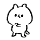
One-Hot Encodingする

In [ ]:
# 最後の encoded 以外は全部ダミー変数化する
df_dummy = pd.get_dummies(df1.iloc[:,1:], )

In [ ]:
# 様子を確認
df_dummy.head()

,encoded,cap-surface_fibrous,cap-surface_groovesmooth,cap-surface_scaly,cap-surface_smooth,cap-color_brown,cap-color_buff,cap-color_cinnamon,cap-color_gray,cap-color_green,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,1,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# 列名がわからないので出力する
df_dummy.columns


Index(['encoded', 'cap-surface_fibrous', 'cap-surface_groovesmooth',
       'cap-surface_scaly', 'cap-surface_smooth', 'cap-color_brown',
       'cap-color_buff', 'cap-color_cinnamon', 'cap-color_gray',
       'cap-color_green',
       ...
       'population_scattered', 'population_several', 'population_solitary',
       'habitat_grasses', 'habitat_leaves', 'habitat_meadows', 'habitat_paths',
       'habitat_urban', 'habitat_waste', 'habitat_woods'],
      dtype='object', length=112)

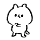
特徴量と正解データに分けておく
x=特徴量、t=正解データ

In [ ]:
# 特徴量
x = df_dummy.iloc[:,1:]
x.head()

,cap-surface_fibrous,cap-surface_groovesmooth,cap-surface_scaly,cap-surface_smooth,cap-color_brown,cap-color_buff,cap-color_cinnamon,cap-color_gray,cap-color_green,cap-color_pink,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# 正解
t = df_dummy.iloc[:,:1]
t.head()

,encoded
0,1
1,0
2,0
3,1
4,0


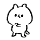
ロジスティック回帰でやってみる

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.3, random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=2, C=0.1, multi_class='auto', solver='lbfgs')

In [ ]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9989447766443897

In [ ]:
# 係数の確認
model.coef_

array([[-6.10375903e-01,  2.28091704e-01,  3.14860388e-02,
         3.50797782e-01, -2.69690274e-01,  5.77637879e-01,
        -3.68732393e-01, -8.32527820e-02, -1.65195214e-01,
         5.31155466e-01, -1.92082330e-01, -1.48437232e-02,
         2.07621524e-01, -2.22618531e-01,  2.19733851e-01,
        -2.19734228e-01, -1.25191835e+00, -1.20877979e+00,
         1.19467971e+00,  4.33037357e-01,  1.55570140e+00,
         2.13318774e-01, -2.57724856e+00,  1.21824478e+00,
         4.22964305e-01, -1.03427147e-01,  1.03426770e-01,
         9.10913844e-01, -9.10914222e-01, -1.30547061e+00,
         1.30547023e+00, -1.88805785e-01, -4.55746695e-01,
         9.88213026e-01,  1.57598722e-01,  9.60626818e-03,
         3.64280858e-01, -7.57210099e-02, -2.42763007e-01,
        -1.35651917e-01, -2.45064780e-01, -3.14722741e-01,
         1.38776684e-01,  3.23176991e-01, -3.23177368e-01,
         1.22884468e+00, -5.45260419e-01,  1.53702675e-01,
        -4.03730473e-01, -4.33556844e-01, -2.61160835e-0

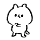
本当に結果が良好なのか確認する。
予測結果と正解データとの誤差を確認することに。

In [ ]:
# 係数は見てみたもののよくわからない
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)
# 結果を予測させてみて、誤差を確認してみる
print('x_train predict:',y_train_pred)
print('x_val predict:',y_val_pred)

x_train predict: [0 1 0 ... 1 0 1]
x_val predict: [0 1 0 ... 0 0 1]


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_val, y_val_pred))

0.001055223355610271
0.0016406890894175555


In [ ]:
# 上記の誤差も結構低いので良好なことがわかる。

In [ ]:
#検証データの正解率
ac = model.score(x_val, y_val)
print(ac)

0.9983593109105825


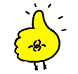
良いスコアでした！めでたしめでたし

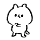
結果が良好だった理由を考察

①学習データ量が潤沢であった

②正解に対する組み合わせが限られていた？

In [ ]:
# クロス集計分析
pd.crosstab([df['class'], df['cap-shape']], [df['cap-surface'], df['cap-color']])

cap-surface         fibrous                                      groovesmooth  \
cap-color             brown cinnamon gray pink  red white yellow        white   
class     cap-shape                                                             
edible    bell            0        0   24    0    0    24      0            0   
          convex        228        4  248    0  144   100     12            0   
          flat          228        4  224    0  144    76     12            0   
          knobbed         4        4   24    0    0    24      0            0   
          sunken         16        0   16    0    0     0      0            0   
poisonous bell            2        0    0    0    0     0      2            1   
          conical         0        0    0    0    0     0      0            1   
          convex          2        0  194   32    0    32    164            0   
          flat            2        0  162    0    0     0    164            1   
          knobbed         2        0    0    0    0     0      2            1   

cap-surface         scaly       ...              smooth                     \
cap-color           brown buff  ... white yellow  brown buff cinnamon gray   
class     cap-shape             ...                                          
edible    bell          2    0  ...    64     64     50    0        0   24   
          convex      208    8  ...    72    112    124    8        2   90   
          flat        208    8  ...     8     48    124    8        2   66   
          knobbed      14    8  ...     0      0     58    8        0   24   
          sunken        0    0  ...     0      0      0    0        0    0   
poisonous bell          2    6  ...     7      4      0    6        0    0   
          conical       0    0  ...     1      2      0    0        0    0   
          convex      182    0  ...    32    164    176   48        0   80   
          flat        182    6  ...    39    166    176   54        0   48   
          knobbed     150    0  ...     1      4    144    0        0    0   

cap-surface                                 
cap-color           pink  red white yellow  
class     cap-shape                         
edible    bell         0    0    88     64  
          convex      10    8   164     76  
          flat        10    8    76     12  
          knobbed      8    8    24      0  
          sunken       0    0     0      0  
poisonous bell         6    0     6      0  
          conical      0    0     0      0  
          convex      32  144   112      0  
          flat         6  144    86      0  
          knobbed      0  144     0      0  

[10 rows x 26 columns]

In [ ]:
# 列が多すぎて訳が分からない

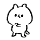
sci-kitlearnのチートシートのことを思い出したので、チートシート通りだと何で実装すべきだったのかを確認する


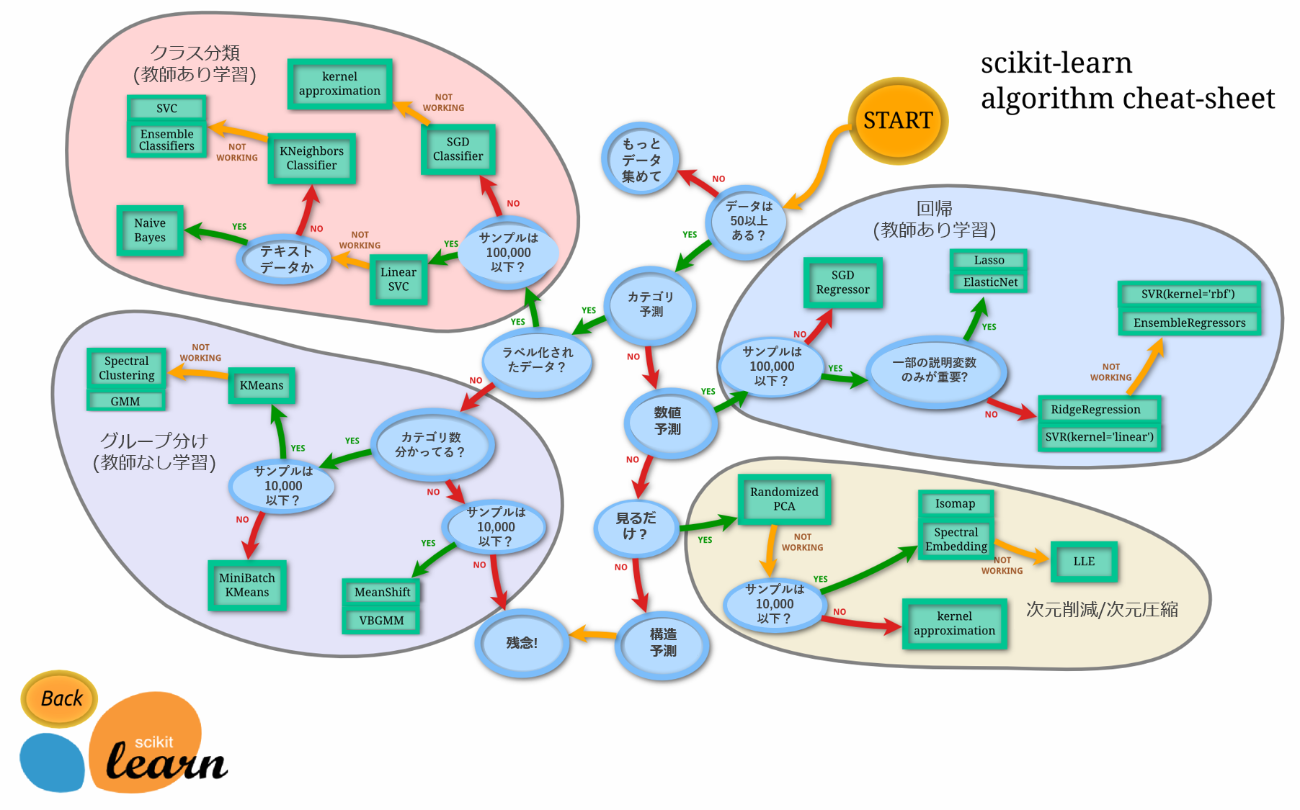

In [ ]:
# チートシートによるとLinearSVCでやるべきだった
# LinearSVCで実装した結果と比較することを決意。

In [33]:
from sklearn.svm import LinearSVC

# モデルの初期化、学習を行う
model = LinearSVC()
# 学習データを使った学習
model.fit(x_train, y_train)
trainscore = model.score(x_train, y_train)
# 作成したモデルに対し、訓練データを使って精度を確かめる
test_score = model.score(x_val, y_val)
print('学習データの学習結果：',trainscore)
print('テストデータの学習結果：',test_score)

学習データの学習結果： 1.0
テストデータの学習結果： 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


確かに精度は上がりました！

In [35]:
import pickle
# 学習済みモデルの保存
with open('kinomodel.pkl', 'wb')as f:
    pickle.dump(model,f)   